# Metody statystyczne zestaw 4
## Autor Paweł Jelonek

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20, 10)
plt.rcParams['axes.titlesize']=20

### Symulacja gry kośćmi

- Kostki: czarna i czerwona
- Prawdopodobieństwo wygrania w grze: $\Large P_{wygr}=\frac{\Sigma (Z > C_{z})}{\Sigma all cases}$ 

In [2]:
class Player:
    
    def __init__(self, funds_amount: int):
        self.funds_amount = funds_amount
        
    def lost_game(self, bet) -> None:
        self.funds_amount -= bet
    
    def won_game(self, bet) -> None:
        self.funds_amount += bet
        
    def __str__(self):
        return f'Player has {self.funds_amount} funds'
    
    def __repr__(self):
        return str(self.__dict__)

In [3]:
def roll_dice() -> int:
    return int(np.random.uniform(1, 7))

In [4]:
def extract_game_data(data: list) -> list:
    prob_win_data = []
    wins = 0
    games = 0
    for game in data:
        games += 1
        if game: wins += 1
        prob_win_data.append((wins/games))
    return prob_win_data

In [5]:
def dice_game_without_bets(n: int = None) -> list:
    game_history = []
    for i in np.arange(n):
        black_dice = roll_dice()
        red_dice = roll_dice()
        player_win_condition = black_dice < red_dice
        game_history.append(player_win_condition)
    return game_history        

### Problem A
- Symulacja $N = 10^6$ rzutów dwoma kostkami
- Porównać experymentalną wartość prawdopodobieństwa wygrania w jednej grze z teoretyczną $= 15/36$

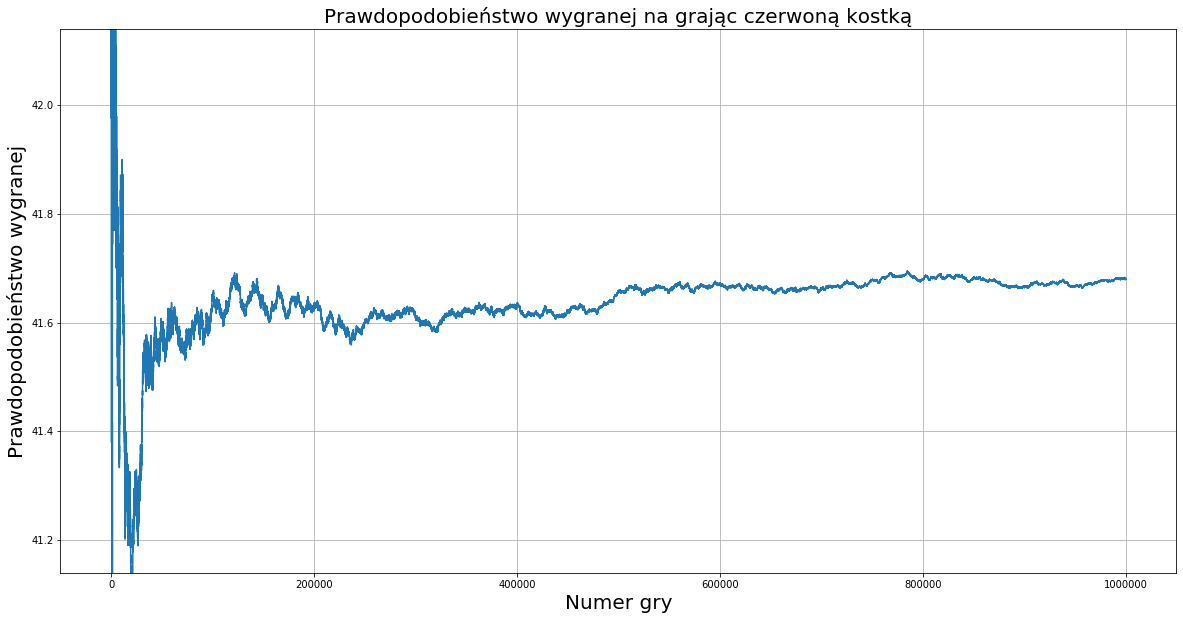

Eksperymentalna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi 0.4163956204237719
Teoretyczna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi 0.4166666666666667


In [9]:
N = 1000000

game_history = dice_game_without_bets(N)
ys = extract_game_data(game_history)
plt.ylim(np.average(ys)*100 - 0.5, np.average(ys)*100 + 0.5)
plt.plot(np.arange(N), [game * 100 for game in ys])
plt.title('Prawdopodobieństwo wygranej na grając czerwoną kostką')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Prawdopodobieństwo wygranej', fontsize=20)
plt.grid()
plt.show()

print('Eksperymentalna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi', sum(ys)/N)
print('Teoretyczna wartość prawdopobonieństwa wygranej kostką czerwoną wynosi', 15/36)

Problem B
- Gracz ma kapitał początkowy $c=500$ 
- Sumulacja gier z zakładem: $1$
- Sumulacja trwa $105$ gier, albo dopóki gracz nie zbankrutuje
- Wykres zależności kapitału od ilości gier - eksperymentalny(z symulacji) oraz teoretyczny $C(N) = c+n*E(wyg)$
- $E(wyg) = -1/6  : teoria$
- Porównać średnią wartość wygranej w jednej grze z wartością oczekiwaną

In [216]:
def dice_game(player: Player, bet_win: int, bet_lost: int, n: int = None) -> tuple:
    players_fund = []
    games_played = 0
    while player.funds_amount > 0 and n > games_played:
        games_played += 1
        black_dice = roll_dice()
        red_dice = roll_dice()
        player_win_condition = black_dice < red_dice
        player.won_game(bet_win) if player_win_condition else player.lost_game(bet_lost)
        players_fund.append(player.funds_amount)
    return players_fund

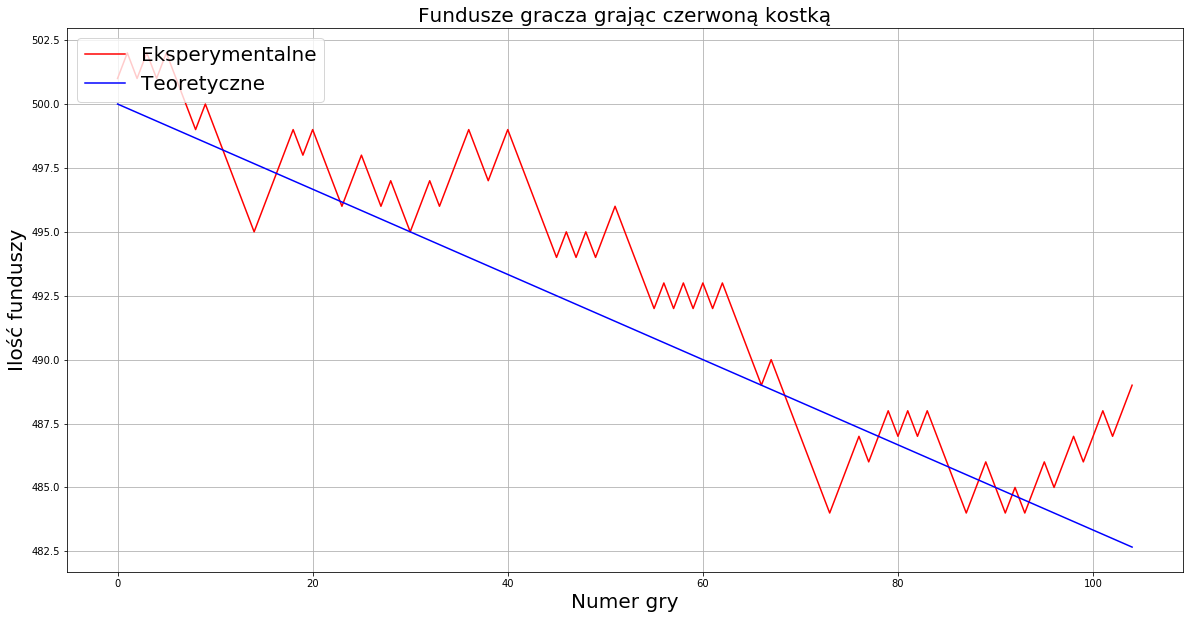

Eksperymentalna wartość oczekiwana wygranej kostką czerwoną wynosi -0.10476190476190476
Teoretyczna wartość oczekiwana wygranej kostką czerwoną wynosi -0.16666666666666666


In [226]:
N = 105
funds = 500
players_bet = 1
ys = dice_game(Player(funds), players_bet, players_bet, N)

plt.plot(np.arange(len(ys)), ys, color='r', label='Eksperymentalne')
plt.plot(np.arange(len(ys)), [funds + i*(-1/6) for i in np.arange(N)], color='b', label='Teoretyczne')
plt.title('Fundusze gracza grając czerwoną kostką')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Ilość funduszy', fontsize=20)
plt.legend(loc='upper left', prop={'size': 20})
plt.grid()
plt.show()

print('Eksperymentalna wartość oczekiwana wygranej kostką czerwoną wynosi', (ys[len(ys)-1] - funds)/N)
print('Teoretyczna wartość oczekiwana wygranej kostką czerwoną wynosi', -1/6)

### Problem C
- To samo co w B ale:
- Gracz w przypadku wygranej otrzymuje $\frac{7}{5} $
- Gracz w przypadku przegranej traci $1 $ 

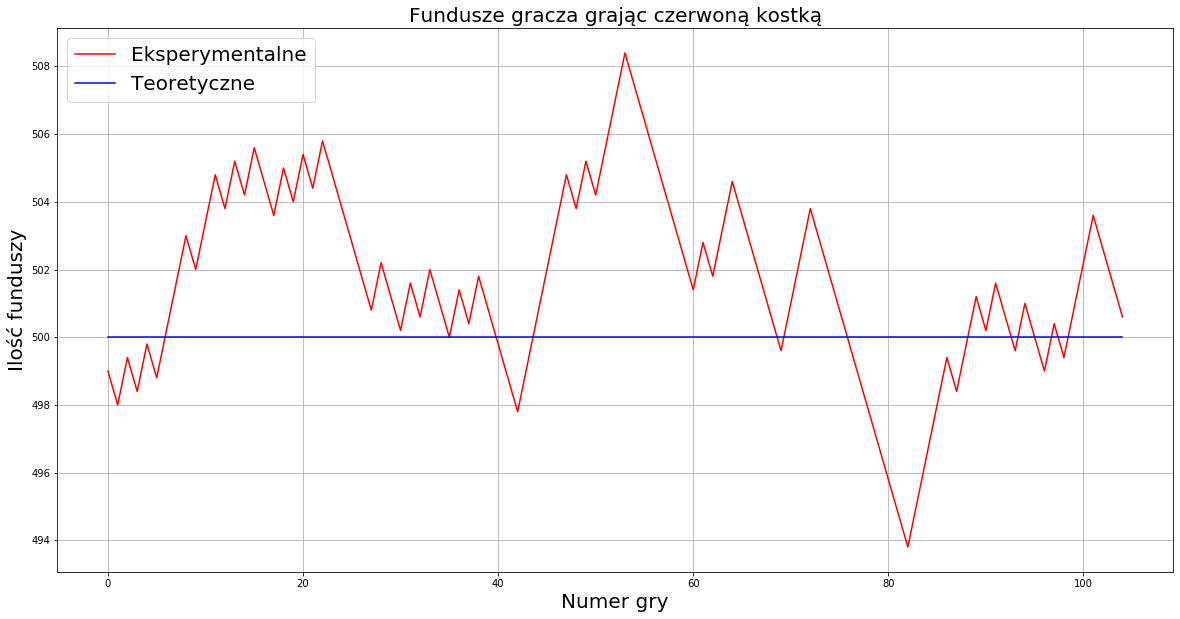

Eksperymentalna wartość oczekiwana wygranej kostką czerwoną wynosi 0.005714285714276186
Teoretyczna wartość oczekiwana wygranej kostką czerwoną wynosi -0.16666666666666666


In [238]:
N = 105
funds = 500
players_bet_win = 7/5
players_bet_lost = 1
ys = dice_game(Player(funds), players_bet_win, players_bet_lost, N)

plt.plot(np.arange(len(ys)), ys, color='r', label='Eksperymentalne')
plt.plot(np.arange(len(ys)), [funds] * len(ys), color='b', label='Teoretyczne')
plt.title('Fundusze gracza grając czerwoną kostką')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Ilość funduszy', fontsize=20)
plt.legend(loc='upper left', prop={'size': 20})
plt.grid()
plt.show()

print('Eksperymentalna wartość oczekiwana wygranej kostką czerwoną wynosi', (ys[len(ys)-1] - funds)/N)
print('Teoretyczna wartość oczekiwana wygranej kostką czerwoną wynosi', -1/6)

### Problem D
Kontrola ilości populacji

- Mamy polulację N osób - rodzice
- $N_{m}$ - ilość mężczyzn
- $N_{f}$ - ilość kobiet
- Parametr $p=$(płodność E$[0,1])$
- Ilość par które mogą mieć dzieci: $N_{p}=p*min(N_{m},N_{f})$
- Dwie polityki kontroli populacji: polityka jednego dziecka i polityka do pierwszego syna

In [7]:
class Generation:
    def __init__(self, number_of_men: int, number_of_women: int, potency: int):
        self.number_of_men = int(number_of_men)
        self.number_of_women = int(number_of_women)
        self.potency = potency
        self.number_of_pairs = None
        
    def one_child_policy(self):
        self.number_of_pairs = min(self.number_of_men, self.number_of_women)
        new_number_of_women = 0
        new_number_of_men = 0
        for i in range(self.number_of_pairs):
            child = self.try_get_child()
            if child is not None:
                if child is 'M':
                    new_number_of_men += 1
                else:
                    new_number_of_women += 1
        self.number_of_men = new_number_of_men
        self.number_of_women = new_number_of_women
        
    def first_son_policy(self):
        self.number_of_pairs = min(self.number_of_men, self.number_of_women)
        new_number_of_women = 0
        new_number_of_men = 0
        for i in range(self.number_of_pairs):
            while True: 
                child = self.try_get_child()
                if child is 'M':
                    new_number_of_men += 1
                    break
                elif child is None:
                    break
                else:
                    new_number_of_women += 1
        self.number_of_men = new_number_of_men
        self.number_of_women = new_number_of_women
        
    def try_get_child(self):
        return self.draw_child() if np.random.uniform() < self.potency else None
    
    def draw_child(self):
        return 'M' if np.random.uniform() < 0.5 else 'F'
    
    def __str__(self):
        return f'Generation has {self.number_of_men + self.number_of_women} people'
    
    def __repr__(self):
        return str(self.__dict__)

In [8]:
def simulate_generation_one_child(n: int, generation: Generation) -> list:
    people_history = []
    for i in range(n):
        generation.one_child_policy()
        people_history.append(generation.number_of_men + generation.number_of_women)
    return people_history

In [9]:
def simulate_generation_first_son(n: int, generation: Generation) -> list:
    people_history = []
    for i in range(n):
        generation.first_son_policy()
        people_history.append(generation.number_of_men + generation.number_of_women)
    return people_history

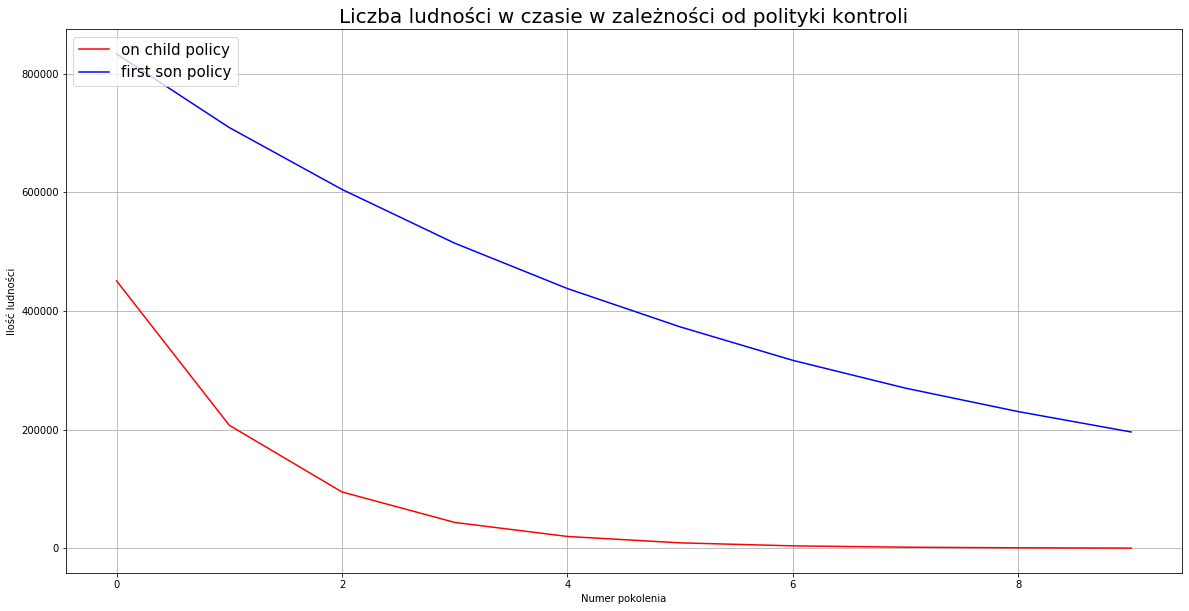

In [14]:
N = 1000000
m = 0.51
f = 0.49
p = 0.92
generations = 10
ys = simulate_generation_one_child(generations, Generation(N * m, N * f, p))
yss = simulate_generation_first_son(generations, Generation(N * m, N * f, p))
plt.plot(np.arange(0, 10), ys, color='r', label='on child policy')
plt.plot(np.arange(0, 10), yss, color='b', label='first son policy')
plt.xlabel('Numer pokolenia')
plt.ylabel('Ilość ludności')
plt.grid()
plt.legend(loc='upper left', prop={'size': 15})
plt.title('Liczba ludności w czasie w zależności od polityki kontroli')
plt.show()    

    
    

    